In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
data_store = pd.read_csv("https://raw.githubusercontent.com/Preethi-PanneerSelvam/Retail-Sales-Forecast-With-ML/main/stores_data_set.csv")
data_store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [4]:
data_sales = pd.read_csv("https://raw.githubusercontent.com/Preethi-PanneerSelvam/Retail-Sales-Forecast-With-ML/main/sales_data_set.csv")
data_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [5]:
data_feature = pd.read_csv("https://raw.githubusercontent.com/Preethi-PanneerSelvam/Retail-Sales-Forecast-With-ML/main/Features_data_set.csv")
data_feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [6]:
data1 = pd.merge(data_sales,data_store,on="Store", how = "inner") # merging data set with store
data1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [7]:
data2 = pd.merge(data_store,data_feature, on='Store', how='inner') # merging data set with feature
data2

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,A,151315,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,A,151315,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,A,151315,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [8]:
data1["diff"] = data1["Store"].astype(str) + '-' + data1["Date"] # creating new column with store and date in one column
data2["diff"] = data2["Store"].astype(str) + '-' + data2["Date"] # creating new column with store and date in one column

In [9]:
data1.tail(4) # last 4 rows

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff
421566,45,98,05/10/2012,628.10,False,B,118221,45-05/10/2012
421567,45,98,12/10/2012,1061.02,False,B,118221,45-12/10/2012
421568,45,98,19/10/2012,760.01,False,B,118221,45-19/10/2012
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012


In [10]:
data2.tail(4) # last 4 rows

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
8189,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [11]:
data1_list = data1["diff"].to_list() # converting column to list
data1_list

['1-05/02/2010',
 '1-12/02/2010',
 '1-19/02/2010',
 '1-26/02/2010',
 '1-05/03/2010',
 '1-12/03/2010',
 '1-19/03/2010',
 '1-26/03/2010',
 '1-02/04/2010',
 '1-09/04/2010',
 '1-16/04/2010',
 '1-23/04/2010',
 '1-30/04/2010',
 '1-07/05/2010',
 '1-14/05/2010',
 '1-21/05/2010',
 '1-28/05/2010',
 '1-04/06/2010',
 '1-11/06/2010',
 '1-18/06/2010',
 '1-25/06/2010',
 '1-02/07/2010',
 '1-09/07/2010',
 '1-16/07/2010',
 '1-23/07/2010',
 '1-30/07/2010',
 '1-06/08/2010',
 '1-13/08/2010',
 '1-20/08/2010',
 '1-27/08/2010',
 '1-03/09/2010',
 '1-10/09/2010',
 '1-17/09/2010',
 '1-24/09/2010',
 '1-01/10/2010',
 '1-08/10/2010',
 '1-15/10/2010',
 '1-22/10/2010',
 '1-29/10/2010',
 '1-05/11/2010',
 '1-12/11/2010',
 '1-19/11/2010',
 '1-26/11/2010',
 '1-03/12/2010',
 '1-10/12/2010',
 '1-17/12/2010',
 '1-24/12/2010',
 '1-31/12/2010',
 '1-07/01/2011',
 '1-14/01/2011',
 '1-21/01/2011',
 '1-28/01/2011',
 '1-04/02/2011',
 '1-11/02/2011',
 '1-18/02/2011',
 '1-25/02/2011',
 '1-04/03/2011',
 '1-11/03/2011',
 '1-18/03/2011

In [12]:
data2_inlist = data2[data2['diff'].isin(data1_list)] # selecting rows that are in list
data2_inlist.reset_index(drop=True, inplace=True) # resetting index
data2_inlist.tail(4) # last 4 rows

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
6431,45,B,118221,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,45-05/10/2012
6432,45,B,118221,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,45-12/10/2012
6433,45,B,118221,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,45-19/10/2012
6434,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,45-26/10/2012


In [13]:
data2_not_in_list = data2[~data2['diff'].isin(data1_list)] # selecting rows that are not in list
data2_not_in_list.reset_index(drop=True, inplace=True) # resetting index
data2_not_in_list.tail(4) # last 4 rows

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
1751,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
1752,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
1753,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
1754,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [14]:
data2.shape, data2_inlist.shape, data2_not_in_list.shape # shape of data

((8190, 15), (6435, 15), (1755, 15))

In [15]:
data2['diff'].nunique(), data2_inlist['diff'].nunique(), data2_not_in_list['diff'].nunique() # number of unique values

(8190, 6435, 1755)

In [16]:
data3 = pd.merge(data1,data2_inlist, on='diff', how='inner') # merging data set with feature in list on diff
data3.tail() # last 5 rows

,Store_x,Dept,Date_x,Weekly_Sales,IsHoliday_x,Type_x,Size_x,diff,Store_y,Type_y,Size_y,Date_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421565,45,93,26/10/2012,2487.80,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,26/10/2012,5203.31,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,26/10/2012,56017.47,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,26/10/2012,6817.48,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [17]:
data3.drop(columns=['Store_y','Type_y','Size_y','Date_y','IsHoliday_y'],inplace=True) # dropping columns
data3.rename(columns={'Store_x':'Store','Date_x':'Date','IsHoliday_x':'IsHoliday','Type_x':'Type','Size_x':'Size'}, inplace=True) # renaming columns
data3.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,93,26/10/2012,2487.80,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [18]:
data2_not_in_list.tail() # last 5 rows

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
1750,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
1751,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
1752,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
1753,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
1754,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [19]:
s = data_sales[['Store','Dept']] # selecting columns with store and dept
s

,Store,Dept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
421565,45,98
421566,45,98
421567,45,98
421568,45,98


In [20]:
s.drop_duplicates(subset=['Store', 'Dept'], inplace=True) # dropping duplicates
s.reset_index(drop=True, inplace=True) # resetting index
s

,Store,Dept
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
3326,45,94
3327,45,95
3328,45,96
3329,45,97


In [21]:
data4 = pd.merge(s, data2_not_in_list, on='Store', how= 'outer') # merging data set with feature not in list
data4.tail()

,Store,Dept,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
129904,45,98,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
129905,45,98,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
129906,45,98,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
129907,45,98,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
129908,45,98,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [22]:
data5 = pd.concat([data3, data4]) # concatenating data sets
data5.reset_index(drop=True, inplace=True) # resetting index
data5.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,45,98,28/06/2013,NaN,False,B,118221,45-28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
551475,45,98,05/07/2013,NaN,False,B,118221,45-05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
551476,45,98,12/07/2013,NaN,False,B,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,19/07/2013,NaN,False,B,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
551478,45,98,26/07/2013,NaN,False,B,118221,45-26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [23]:
data5['Date'] = data5['Date'].apply(lambda x: x.replace('/','-')) # replacing / with -
data5['Date'] = pd.to_datetime(data5['Date'], format='%d-%m-%Y', errors='coerce') # converting to datetime format

In [24]:
data5['IsHoliday'] = data5['IsHoliday'].map({True:1, False:0}) # mapping true and false to 1 and 0
data5['Type'] = data5['Type'].map({'A':1, 'B':2, 'C':3}) # mapping A,B,C to 1,2,3

In [25]:
data5.tail() # last 5 rows

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,45,98,2013-06-28,NaN,0,2,118221,45-28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
551475,45,98,2013-07-05,NaN,0,2,118221,45-05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
551476,45,98,2013-07-12,NaN,0,2,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,2013-07-19,NaN,0,2,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
551478,45,98,2013-07-26,NaN,0,2,118221,45-26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [26]:
data5.drop(columns=['diff'], inplace=True) # dropping column

data5 = data5.sort_values(by=['Date','Store','Dept']) # sorting values
data5.reset_index(drop=True, inplace=True) # resetting index

data5.tail() # last 5 rows

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,45,94,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,45,95,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,45,96,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,45,97,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,45,98,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [27]:
data5['Day'] = data5['Date'].dt.day # extracting day
data5['Month'] = data5['Date'].dt.month # extracting month
data5['Year'] = data5['Date'].dt.year # extracting year
data5.drop(columns=['Date'], inplace=True) # dropping column
data5

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,2,50605.27,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
2,1,3,13740.12,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
3,1,4,39954.04,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
4,1,5,32229.38,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551475,45,95,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551476,45,96,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551477,45,97,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013


In [28]:
data5 = data5[['Day','Month','Year','Store','Dept','Type','Weekly_Sales','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']] # rearranging columns
data5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [29]:
data5.dtypes # data types

Day               int64
Month             int64
Year              int64
Store             int64
Dept              int64
Type              int64
Weekly_Sales    float64
Size              int64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [30]:
#null values
data5.isnull().sum() # null values

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    129909
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64

In [31]:
data5.describe().T # summary

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000


In [32]:
data5[data5['Weekly_Sales']<=0] # weekly sales less than or equal to 0

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
389,5,2,2010,6,47,1,-59.00,202505,0,40.43,2.572,NaN,NaN,NaN,NaN,NaN,212.622352,7.259
601,5,2,2010,9,49,2,-15.00,125833,0,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415
714,5,2,2010,11,19,1,0.00,207499,0,46.04,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368
1039,5,2,2010,15,80,2,-0.04,123737,0,19.83,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.350
1345,5,2,2010,20,19,1,0.00,203742,0,25.92,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419896,26,10,2012,19,47,1,-18.00,203819,0,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992
419943,26,10,2012,20,19,1,-3.97,203742,0,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.151590,7.293
420601,26,10,2012,29,80,2,-178.15,93638,0,57.58,3.917,5581.80,2.98,NaN,398.23,396.11,138.728161,9.151
420972,26,10,2012,35,80,2,-16.51,103681,0,58.99,3.882,6221.06,42.48,103.00,273.90,996.79,142.762411,8.665


In [33]:
data5['Weekly_Sales'] = data5['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x) # replacing weekly sales less than or equal to 0 with nan
data5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [34]:
data5.describe().T # summary

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Weekly_Sales,420212.0,16033.114591,22729.492116,0.010,2120.130000,7661.700000,20271.265000,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000


In [35]:
data5.isnull().sum() # null values check

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64

In [36]:
data5.tail() # last 5 rows

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [37]:
data5['markdown'] = data5[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1).astype(int) # creating new column with 0 and 1
data5

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1


In [38]:
data5.groupby('markdown')['Weekly_Sales'].mean() # mean weekly sales based on markdown

markdown
0    15922.137810
1    16231.116041
Name: Weekly_Sales, dtype: float64

In [39]:
data5.describe() # summary

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,420212.000000,551479.000000,551479.000000,551479.000000,551479.000000,280405.000000,207897.000000,254619.000000,248649.000000,281341.000000,508176.000000,508176.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,16033.114591,136073.691863,0.071905,58.703624,3.413010,7369.403469,3489.575965,1859.728572,3355.891061,4261.631495,172.200115,7.775470,0.510157
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22729.492116,61207.331445,0.258330,18.685408,0.427725,9439.253385,8920.862286,11633.662079,6889.409946,13679.851274,39.595683,1.863253,0.499897
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,0.000000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,2120.130000,93638.000000,0.000000,45.160000,3.050000,2014.470000,74.240000,7.330000,319.190000,1524.870000,132.529129,6.614000,0.000000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7661.700000,128107.000000,0.000000,59.940000,3.524000,5011.720000,397.960000,41.390000,1202.440000,2825.360000,182.517732,7.771000,1.000000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,20271.265000,202505.000000,0.000000,73.160000,3.746000,9264.480000,2359.440000,177.270000,3380.280000,4930.020000,213.871114,8.549000,1.000000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,1.000000


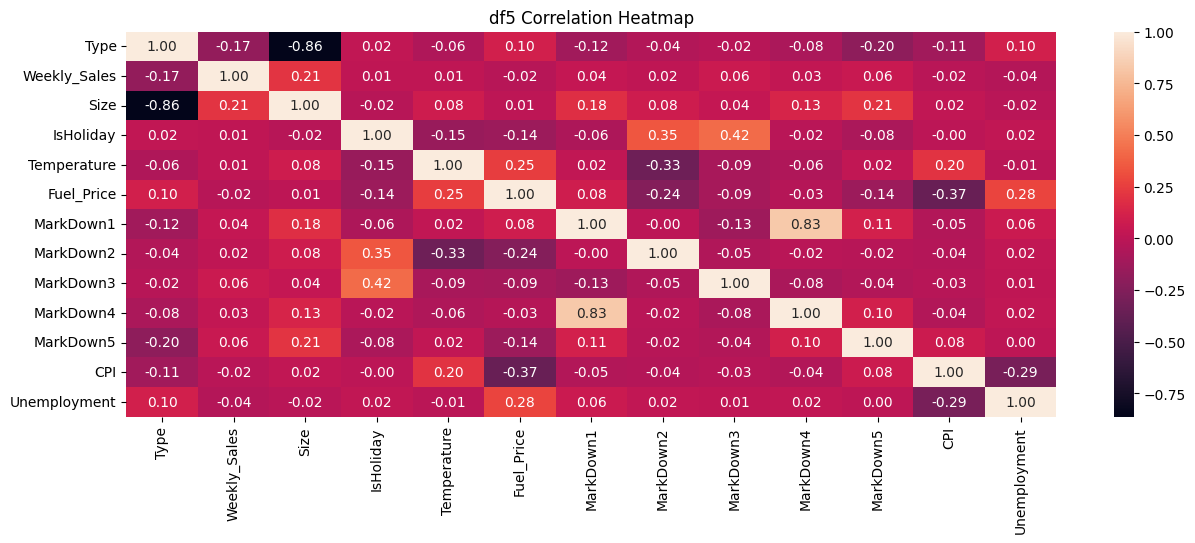

In [40]:
# Calculate the correlation matrix
data5_corr = data5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr() # drop columns

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(data5_corr, annot=True, fmt=".2f")
plt.title("df5 Correlation Heatmap")
plt.show()

In [41]:
data5['diff'] = data5['Day'].astype(str)+data5['Month'].astype(str)+data5['Year'].astype(str)+'-'+data5['Store'].astype(str)+'-'+data5['Dept'].astype(str) # creating new column with diff
data5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-98


In [42]:
data5.nunique() # number of unique values

Day                 31
Month               12
Year                 4
Store               45
Dept                81
Type                 3
Weekly_Sales    358785
Size                40
IsHoliday            2
Temperature       4178
Fuel_Price        1011
MarkDown1         4023
MarkDown2         2715
MarkDown3         2885
MarkDown4         3405
MarkDown5         4045
CPI               2505
Unemployment       404
markdown             2
diff            551479
dtype: int64

# **Method 1 - with Markdown**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [44]:
# find Training and Testing accuracy of algorithm

def algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, algorithm):# x - features, y - target

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train) # prediction on training data
    y_pred_test = model.predict(x_test) # prediction on testing data
    r2_train = r2_score(y_train, y_pred_train) # R2 score on training data
    r2_test = r2_score(y_test, y_pred_test) # R2 score on testing data

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy = {'algorithm': algorithm.__name__, # name of algorithm
                'R2_train' : r2_train, # R2 score on training data
                'R2_test'  : r2_test} # R2 score on testing data

    return accuracy

In [45]:
# check different algorithms and predict null values using best algorithm (Random Forest performs well compare to others)

def ml_regression(df, null_features, label):

    # only label column with null values and drop the other null columns from df
    df = df.drop(columns=null_features) # drop columns with null values

    # filter null values into separate dataframe and reset index order
    df_null = df[df[label].isnull()] # select rows with null values
    df_null.reset_index(drop=True, inplace=True) # reset index

    # also filter non-null values into separate dataframe and reset index order
    df_notnull = df[df[label].notnull()] # select rows with non-null values
    df_notnull.reset_index(drop=True, inplace=True) # reset index

    # make vector(x) and label(y) variables
    x = df_notnull.drop(columns=[label, 'diff'], axis=1) # drop label column
    y = df_notnull[label] # select label column
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) # split data into training and testing

    # calculate Training and Testing accuracy of different algorithms and evaluate model performance using metrics
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, DecisionTreeRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, ExtraTreesRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, RandomForestRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, AdaBoostRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, GradientBoostingRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, XGBRegressor))

    # Random Forest algorithm performs well to predict unseen data
    model = RandomForestRegressor().fit(x_train, y_train) # fit model
    y_pred = model.predict(x_test) # predict

    # evaluate model performance using metrics
    mse = mean_squared_error(y_test, y_pred) # mean squared error for regression
    rmse = np.sqrt(mse) # root mean squared error
    r2 = r2_score(y_test, y_pred) # R2 score
    mae = mean_absolute_error(y_test, y_pred) # mean absolute error

    metrics = {'R2': r2, # R2 score
              'Mean Absolute Error': mae, # mean absolute error
              'Mean Squared Error': mse, # mean squared error
              'Root Mean Squared Error': rmse} # root mean squared error
    print(metrics)

    # predict null values using model
    y_pred = model.predict(df_null.drop(columns=[label, 'diff'], axis=1)) # predict

    # make dataframe of predicted label value and merge with non-null values
    df_null[label] = pd.DataFrame(y_pred) # predicted label value
    df_final = pd.concat([df_null,df_notnull], axis=0, ignore_index=True) # merge
    return df_final # return dataframe

In [46]:
# drop the 'markdown' column and copy to new variable

df_m1 = data5.copy() # copy dataframe
df_m1.drop(columns=['markdown'],inplace=True) # drop 'markdown' column
df_m1.tail() # check

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-98


In [47]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown1'

df_markdown1 = ml_regression(df_m1, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1') # predict 'MarkDown1'
df_markdown1 # check

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999691949469}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999938172486, 'R2_test': 0.9999999666926942}
{'algorithm': 'AdaBoostRegressor', 'R2_train': -0.07032390677095335, 'R2_test': -0.039578511192108756}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7328854690525646, 'R2_test': 0.7356472560550742}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9829894411143196, 'R2_test': 0.9827814393570967}
{'R2': 1.0, 'Mean Absolute Error': 9.232411206462812e-12, 'Mean Squared Error': 3.2169210917995045e-22, 'Root Mean Squared Error': 1.793577735086914e-11}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,7349.217,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,7349.217,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,7349.217,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,7349.217,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,7349.217,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,212.020,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,212.020,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,212.020,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,212.020,2672013-45-97


In [48]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown2'

df_markdown2 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown2') # predict 'MarkDown2'
df_markdown2 # check

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999787052426}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.46973983620289295, 'R2_test': 0.45691072595620563}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.858323657511989, 'R2_test': 0.8531673429046563}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9987127784289968, 'R2_test': 0.9986624033622861}
{'R2': 1.0, 'Mean Absolute Error': 4.011829798675245e-12, 'Mean Squared Error': 1.638294390641164e-22, 'Root Mean Squared Error': 1.2799587456793925e-11}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown2,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,6913.975,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,6913.975,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,6913.975,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,6913.975,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,6913.975,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,851.730,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,851.730,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,851.730,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,851.730,2672013-45-97


In [49]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown3'

df_markdown3 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown3') # predict 'MarkDown3'
df_markdown3 # check

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999999948795}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999999991813, 'R2_test': 0.9999999999985575}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.8792916221474593, 'R2_test': 0.8823190355579311}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9247814346124927, 'R2_test': 0.9249349111959401}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999600978893889, 'R2_test': 0.9999594604436224}
{'R2': 0.9999999999976584, 'Mean Absolute Error': 0.00039286191414251417, 'Mean Squared Error': 0.0003233654047207376, 'Root Mean Squared Error': 0.017982363713392565}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown3,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,139.8878,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,139.8878,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,139.8878,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,139.8878,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,139.8878,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,2.0600,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,2.0600,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,2.0600,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,2.0600,2672013-45-97


In [50]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown4'

df_markdown4 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown5','CPI','Unemployment'], 'MarkDown4') # predict 'MarkDown4'
df_markdown4 # check

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999793463091}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999999895076, 'R2_test': 0.9999999999692517}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.5720702324022802, 'R2_test': 0.5812035848813442}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7897004104645765, 'R2_test': 0.7947015822917546}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9921265472567694, 'R2_test': 0.9920267462123961}
{'R2': 0.9999999999812246, 'Mean Absolute Error': 0.000306111003494281, 'Mean Squared Error': 0.0009197415079428438, 'Root Mean Squared Error': 0.030327240361477728}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown4,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,16370.7742,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,16370.7742,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,16370.7742,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,16370.7742,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,16370.7742,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,10.8800,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,10.8800,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,10.8800,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,10.8800,2672013-45-97


In [51]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown5'

df_markdown5 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'], 'MarkDown5') # predict 'MarkDown5'
df_markdown5 # check

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999974666282}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6821463422570241, 'R2_test': 0.731132835944013}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.85538462388852, 'R2_test': 0.8658268189876881}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9967966861692091, 'R2_test': 0.9972315628762662}
{'R2': 1.0, 'Mean Absolute Error': 4.8679256435228896e-12, 'Mean Squared Error': 7.189522065100963e-23, 'Root Mean Squared Error': 8.47910494397903e-12}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown5,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,4779.444,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,4779.444,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,4779.444,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,4779.444,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,4779.444,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,1864.570,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,1864.570,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,1864.570,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,1864.570,2672013-45-97


In [52]:
df_m1 # check the dataframe

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,diff
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-1
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-2
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-3
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-4
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-97


In [53]:
# remove all old MarkDown(1-5) columns from df_m1

df_m1 = df_m1.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1) # removing old 'MarkDown(1-5)' columns
df_m1.tail() # check

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-98


In [54]:
# now merge all new predicted 'MarkDown(1-5)' columns --> one by one with df_m1 dataframe --> based on 'diff' column

df_m1 = pd.merge(df_m1, df_markdown1[['MarkDown1', 'diff']], on='diff', how='inner') # based on 'diff' merging with 'MarkDown1'
df_m1 = pd.merge(df_m1, df_markdown2[['MarkDown2', 'diff']], on='diff', how='inner') # based on 'diff' merging with 'MarkDown2'
df_m1 = pd.merge(df_m1, df_markdown3[['MarkDown3', 'diff']], on='diff', how='inner') # based on 'diff' merging with 'MarkDown3'
df_m1 = pd.merge(df_m1, df_markdown4[['MarkDown4', 'diff']], on='diff', how='inner') # based on 'diff' merging with 'MarkDown4'
df_m1 = pd.merge(df_m1, df_markdown5[['MarkDown5', 'diff']], on='diff', how='inner') # based on 'diff' merging with 'MarkDown5'
df_m1

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,211.096358,8.106,522010-1-1,7349.217,6913.975,139.8878,16370.7742,4779.444
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,211.096358,8.106,522010-1-2,7349.217,6913.975,139.8878,16370.7742,4779.444
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,211.096358,8.106,522010-1-3,7349.217,6913.975,139.8878,16370.7742,4779.444
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,211.096358,8.106,522010-1-4,7349.217,6913.975,139.8878,16370.7742,4779.444
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,211.096358,8.106,522010-1-5,7349.217,6913.975,139.8878,16370.7742,4779.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94,212.020,851.730,2.0600,10.8800,1864.570
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95,212.020,851.730,2.0600,10.8800,1864.570
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96,212.020,851.730,2.0600,10.8800,1864.570
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97,212.020,851.730,2.0600,10.8800,1864.570


In [55]:
# next train Machine learning model with df_m1 --> to predict 'CPI'

df_cpi = ml_regression(df_m1, ['Weekly_Sales','Unemployment'], 'CPI') # predict 'CPI' with 'Weekly_Sales' and 'Unemployment'
df_cpi

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999999999999}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.5291310244677426, 'R2_test': 0.5299426364980977}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9864523173718716, 'R2_test': 0.9863873650620182}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999729822001312, 'R2_test': 0.9999723994230533}
{'R2': 1.0, 'Mean Absolute Error': 2.785647241844681e-10, 'Mean Squared Error': 2.8200825901576343e-16, 'Root Mean Squared Error': 1.679310153056199e-08}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,CPI,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,3,5,2013,1,1,1,151315,0,66.66,3.386,225.161798,352013-1-1,2298.63,2.0000,129.90,55.46,1301.04
1,3,5,2013,1,2,1,151315,0,66.66,3.386,225.161798,352013-1-2,2298.63,2.0000,129.90,55.46,1301.04
2,3,5,2013,1,3,1,151315,0,66.66,3.386,225.161798,352013-1-3,2298.63,2.0000,129.90,55.46,1301.04
3,3,5,2013,1,4,1,151315,0,66.66,3.386,225.161798,352013-1-4,2298.63,2.0000,129.90,55.46,1301.04
4,3,5,2013,1,5,1,151315,0,66.66,3.386,225.161798,352013-1-5,2298.63,2.0000,129.90,55.46,1301.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,4,2013,45,94,2,118221,0,50.64,3.615,193.589304,2642013-45-94,1260.65,441.1894,57.52,40.51,2476.18
551475,26,4,2013,45,95,2,118221,0,50.64,3.615,193.589304,2642013-45-95,1260.65,441.1894,57.52,40.51,2476.18
551476,26,4,2013,45,96,2,118221,0,50.64,3.615,193.589304,2642013-45-96,1260.65,441.1894,57.52,40.51,2476.18
551477,26,4,2013,45,97,2,118221,0,50.64,3.615,193.589304,2642013-45-97,1260.65,441.1894,57.52,40.51,2476.18


In [56]:
# drop old 'CPI' column and merge the new predicted 'CPI' columns with df_m1 --> based on 'diff' column

df_m1 = df_m1.drop(columns=['CPI'], axis=1) # drop old 'CPI' column
df_m1 = pd.merge(df_m1, df_cpi[['CPI', 'diff']], on='diff', how='inner') # based on 'diff' merging with 'CPI'
df_m1.tail() # check

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,Unemployment,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-94,212.02,851.73,2.06,10.88,1864.57,193.261923
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-95,212.02,851.73,2.06,10.88,1864.57,193.261923
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-96,212.02,851.73,2.06,10.88,1864.57,193.261923
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-97,212.02,851.73,2.06,10.88,1864.57,193.261923
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-98,212.02,851.73,2.06,10.88,1864.57,193.261923


In [57]:
# next train Machine learning model with df_m1 --> to predict 'Unemployment'

df_unemployment = ml_regression(df_m1, ['Weekly_Sales'], 'Unemployment') # predict 'Unemployment' with 'Weekly_Sales'
df_unemployment # check

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.467285503492733, 'R2_test': 0.46811802512189704}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.95828040063238, 'R2_test': 0.9583686954085632}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9996184028626046, 'R2_test': 0.9996130370563339}
{'R2': 1.0, 'Mean Absolute Error': 2.1346112025139247e-14, 'Mean Squared Error': 8.798724004817215e-28, 'Root Mean Squared Error': 2.966264318097296e-14}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,Unemployment,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
0,3,5,2013,1,1,1,151315,0,66.66,3.386,6.314,352013-1-1,2298.63,2.0000,129.90,55.46,1301.04,225.161798
1,3,5,2013,1,2,1,151315,0,66.66,3.386,6.314,352013-1-2,2298.63,2.0000,129.90,55.46,1301.04,225.161798
2,3,5,2013,1,3,1,151315,0,66.66,3.386,6.314,352013-1-3,2298.63,2.0000,129.90,55.46,1301.04,225.161798
3,3,5,2013,1,4,1,151315,0,66.66,3.386,6.314,352013-1-4,2298.63,2.0000,129.90,55.46,1301.04,225.161798
4,3,5,2013,1,5,1,151315,0,66.66,3.386,6.314,352013-1-5,2298.63,2.0000,129.90,55.46,1301.04,225.161798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,4,2013,45,94,2,118221,0,50.64,3.615,8.335,2642013-45-94,1260.65,441.1894,57.52,40.51,2476.18,193.589304
551475,26,4,2013,45,95,2,118221,0,50.64,3.615,8.335,2642013-45-95,1260.65,441.1894,57.52,40.51,2476.18,193.589304
551476,26,4,2013,45,96,2,118221,0,50.64,3.615,8.335,2642013-45-96,1260.65,441.1894,57.52,40.51,2476.18,193.589304
551477,26,4,2013,45,97,2,118221,0,50.64,3.615,8.335,2642013-45-97,1260.65,441.1894,57.52,40.51,2476.18,193.589304


In [58]:
# drop old 'Unemployment' column and merge the new predicted 'Unemployment' columns with df_m1 --> based on 'diff' column

df_m1 = df_m1.drop(columns=['Unemployment'], axis=1) # drop old 'Unemployment' column
df_m1 = pd.merge(df_m1, df_unemployment[['Unemployment', 'diff']], on='diff', how='inner') # based on 'diff' merging with 'Unemployment'
df_m1.tail() # check

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,2672013-45-94,212.02,851.73,2.06,10.88,1864.57,193.261923,8.67414
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,2672013-45-95,212.02,851.73,2.06,10.88,1864.57,193.261923,8.67414
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,2672013-45-96,212.02,851.73,2.06,10.88,1864.57,193.261923,8.67414
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,2672013-45-97,212.02,851.73,2.06,10.88,1864.57,193.261923,8.67414
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,2672013-45-98,212.02,851.73,2.06,10.88,1864.57,193.261923,8.67414


In [59]:
# finally train Machine learning model with df_m1 --> to predict 'Weekly_Sales'

df_weekly_sales = ml_regression(df_m1, [], 'Weekly_Sales') # predict 'Weekly_Sales' with 'diff'
df_weekly_sales # check

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9495169945387606}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9796617306412608}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9964576606795011, 'R2_test': 0.9742869269659948}
{'algorithm': 'AdaBoostRegressor', 'R2_train': -0.28795856472507375, 'R2_test': -0.3106073315446962}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7502709892338892, 'R2_test': 0.750654292475031}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9489933215737247, 'R2_test': 0.9442800256247539}
{'R2': 0.9748791072384139, 'Mean Absolute Error': 1427.5557457004152, 'Mean Squared Error': 12734936.209994027, 'Root Mean Squared Error': 3568.604238353425}


,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,6,47,1,197.2974,202505,0,40.43,2.572,522010-6-47,6934.3291,6248.0507,41.3830,43353.1862,7349.4963,212.622352,7.259
1,5,2,2010,9,49,2,38.0168,125833,0,38.01,2.572,522010-9-49,5664.8757,2521.3248,69.9255,6867.1551,3879.6494,214.655459,6.415
2,5,2,2010,11,19,1,454.1571,207499,0,46.04,2.572,522010-11-19,10253.6520,5357.1783,52.8001,43381.1721,6720.6197,214.424881,7.368
3,5,2,2010,15,80,2,52.3075,123737,0,19.83,2.954,522010-15-80,5878.9002,13353.5553,89.9504,8402.3387,4714.3803,131.527903,8.350
4,5,2,2010,20,19,1,174.9807,203742,0,25.92,2.784,522010-20-19,10696.0154,6247.1590,43.4750,61584.8619,7347.4602,204.247194,8.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,10,2012,45,93,2,2487.8000,118221,0,58.85,3.882,26102012-45-93,4018.9100,58.0800,100.0000,211.9400,858.3300,192.308899,8.667
551475,26,10,2012,45,94,2,5203.3100,118221,0,58.85,3.882,26102012-45-94,4018.9100,58.0800,100.0000,211.9400,858.3300,192.308899,8.667
551476,26,10,2012,45,95,2,56017.4700,118221,0,58.85,3.882,26102012-45-95,4018.9100,58.0800,100.0000,211.9400,858.3300,192.308899,8.667
551477,26,10,2012,45,97,2,6817.4800,118221,0,58.85,3.882,26102012-45-97,4018.9100,58.0800,100.0000,211.9400,858.3300,192.308899,8.667


In [60]:
df_m1_weekly_sales = df_weekly_sales.copy() # copy df_weekly_sales to df_m1_weekly_sales
df_m1_weekly_sales.describe().T # check

,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.00000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.00000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.00000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.00000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.00000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.00000,2.000000,3.000000
Weekly_Sales,551479.0,15634.543022,22614.862815,0.010,1841.455000,7253.55000,19794.265000,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.00000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.00000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.94000,73.160000,101.950000


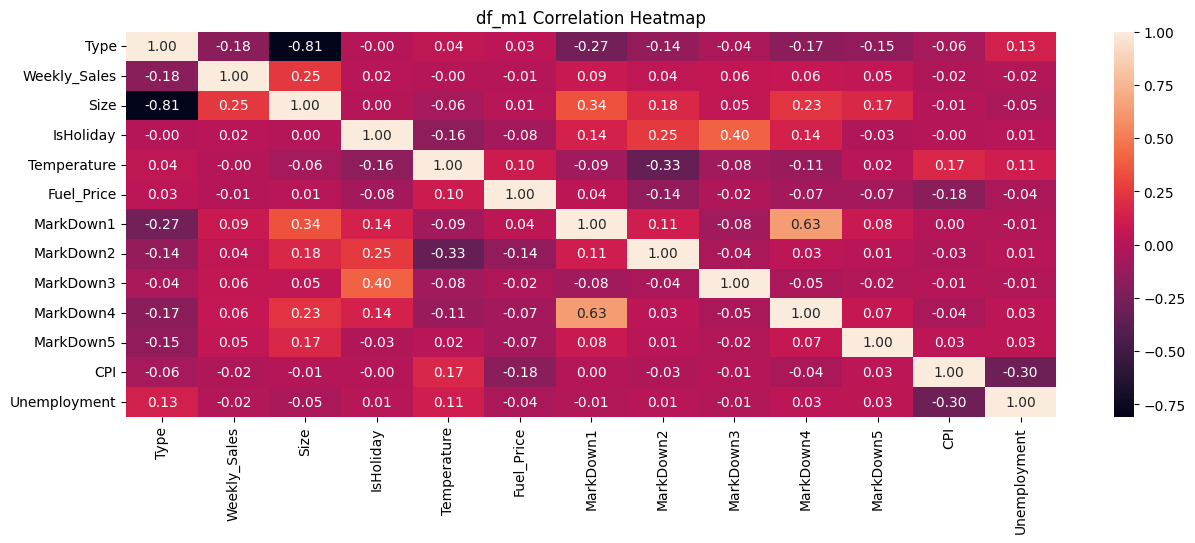

In [61]:
# Calculate the correlation matrix
df_m1_corr = df_m1_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr() # drop 'Day', 'Month', 'Year', 'Store', 'Dept' columns and drop null values

# Create a heatmap
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df_m1_corr, annot=True, fmt=".2f")  # Adjust the formatting if needed
plt.title("df_m1 Correlation Heatmap")
plt.show()

In [62]:
# filter null values into separate dataframe and reset index order
df_null = df_m1[df_m1['Weekly_Sales'].isnull()] # filter null values
df_null.reset_index(drop=True, inplace=True) # reset index

# also filter non-null values into separate dataframe and reset index order
df_notnull = df_m1[df_m1['Weekly_Sales'].notnull()] # filter non-null values
df_notnull.reset_index(drop=True, inplace=True) # reset index

# make vector(x) and label(y) variables
x = df_notnull.drop(columns=['Weekly_Sales', 'diff'], axis=1) # drop 'Weekly_Sales' and 'diff' columns
y = df_notnull['Weekly_Sales'] # select 'Weekly_Sales' column
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) # split data into training and testing

# Random Forest algorithm performs well to predict unseen data
model = RandomForestRegressor().fit(x_train, y_train) # train model
y_pred = model.predict(x_test) # predict

# evaluate model performance using metrics
mse = mean_squared_error(y_test, y_pred) # mean squared error
rmse = np.sqrt(mse) # root mean squared error
r2 = r2_score(y_test, y_pred) # r2 score
mae = mean_absolute_error(y_test, y_pred) # mean absolute error

metrics = {'R2': r2, # 'R2' is short for 'coefficient of determination'
           'Mean Absolute Error': mae, # 'Mean Absolute Error' is short for 'mean absolute error'
           'Mean Squared Error': mse, # 'Mean Squared Error' is short for 'mean squared error'
           'Root Mean Squared Error': rmse} # 'Root Mean Squared Error' is short for 'root mean squared error'

print(metrics)

{'R2': 0.9745735632726292, 'Mean Absolute Error': 1432.695179900765, 'Mean Squared Error': 12889830.502587272, 'Root Mean Squared Error': 3590.2410089835575}


In [63]:
import pickle

# save the model to pickle
with open("model1_markdown.pkl", 'wb') as f:
    pickle.dump(model, f)

# **Method 2 - without markdown**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [65]:
# find Training and Testing accuracy of algorithm

def algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, algorithm): # function to find Training and Testing accuracy of algorithm

    model = algorithm().fit(x_train, y_train) # train model
    y_pred_train = model.predict(x_train) # predict
    y_pred_test = model.predict(x_test) # predict
    r2_train = r2_score(y_train, y_pred_train) # r2 score
    r2_test = r2_score(y_test, y_pred_test) # r2 score

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy = {'algorithm': algorithm.__name__, # 'algorithm' is short for 'algorithm name'
                'R2_train' : r2_train, # 'R2_train' is short for 'coefficient of determination'
                'R2_test'  : r2_test} # 'R2_test' is short for 'coefficient of determination'

    return accuracy

In [66]:
# check different algorithms and predict null values using best algorithm (Random Forest performs well compare to others)

def ml_regression(df, null_features, label): # function to check different algorithms and predict null values using best algorithm

    # only label column with null values and drop the other null columns from df
    df = df.drop(columns=null_features) # drop null columns

    # filter null values into separate dataframe and reset index order
    df_null = df[df[label].isnull()] # filter null values
    df_null.reset_index(drop=True, inplace=True) # reset index

    # also filter non-null values into separate dataframe and reset index order
    df_notnull = df[df[label].notnull()] # filter non-null values
    df_notnull.reset_index(drop=True, inplace=True) # reset index

    # make vector(x) and label(y) variables
    x = df_notnull.drop(columns=[label, 'diff'], axis=1) # drop 'Weekly_Sales' and 'diff' columns
    y = df_notnull[label] # select 'Weekly_Sales' column
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) # split data into training and testing

    # calculate Training and Testing accuracy of different algorithms and evaluate model performance using metrics
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, DecisionTreeRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, ExtraTreesRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, RandomForestRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, AdaBoostRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, GradientBoostingRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, XGBRegressor))

    # Random Forest algorithm performs well to predict unseen data
    model = RandomForestRegressor().fit(x_train, y_train) # train model
    y_pred = model.predict(x_test) # predict

    # evaluate model performance using metrics
    mse = mean_squared_error(y_test, y_pred) # 'Mean Squared Error' is short for 'mean squared error'
    rmse = np.sqrt(mse) # 'Root Mean Squared Error' is short for 'root mean squared error'
    r2 = r2_score(y_test, y_pred) # 'R2' is short for 'coefficient of determination'
    mae = mean_absolute_error(y_test, y_pred) # 'Mean Absolute Error' is short for 'mean absolute error'

    metrics = {'R2': r2, # 'R2' is short for 'coefficient of determination'
              'Mean Absolute Error': mae, # 'Mean Absolute Error' is short for 'mean absolute error'
              'Mean Squared Error': mse, # 'Mean Squared Error' is short for 'mean squared error'
              'Root Mean Squared Error': rmse} # 'Root Mean Squared Error' is short for 'root mean squared error'
    print(metrics)

    # predict null values using model
    y_pred = model.predict(df_null.drop(columns=[label, 'diff'], axis=1)) # drop 'Weekly_Sales' and 'diff' columns

    # make dataframe of predicted label value and merge with non-null values
    df_null[label] = pd.DataFrame(y_pred) # make dataframe of predicted label value
    df_final = pd.concat([df_null,df_notnull], axis=0, ignore_index=True) # merge with non-null values
    return df_final # return dataframe

In [67]:
# drop all MarkDown(1-5) columns
df_m2 = data5.copy() # make copy
df_m2.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','markdown'],inplace=True) # drop all MarkDown(1-5) columns
df_m2.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-98


In [68]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'CPI'

df_m2_cpi = ml_regression(df_m2, ['Weekly_Sales','Unemployment'], 'CPI') # make new dataframe for only not-null value columns
df_m2_cpi

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999999999304}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.45734066835809695, 'R2_test': 0.4601754238651181}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9862542573066267, 'R2_test': 0.986164892030803}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999736020379673, 'R2_test': 0.999973206568554}
{'R2': 1.0, 'Mean Absolute Error': 2.038241711705077e-13, 'Mean Squared Error': 5.662501684334309e-26, 'Root Mean Squared Error': 2.379601160769239e-13}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,CPI,diff
0,3,5,2013,1,1,1,151315,0,66.66,3.386,225.155944,352013-1-1
1,3,5,2013,1,2,1,151315,0,66.66,3.386,225.155944,352013-1-2
2,3,5,2013,1,3,1,151315,0,66.66,3.386,225.155944,352013-1-3
3,3,5,2013,1,4,1,151315,0,66.66,3.386,225.155944,352013-1-4
4,3,5,2013,1,5,1,151315,0,66.66,3.386,225.155944,352013-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,4,2013,45,94,2,118221,0,50.64,3.615,193.589304,2642013-45-94
551475,26,4,2013,45,95,2,118221,0,50.64,3.615,193.589304,2642013-45-95
551476,26,4,2013,45,96,2,118221,0,50.64,3.615,193.589304,2642013-45-96
551477,26,4,2013,45,97,2,118221,0,50.64,3.615,193.589304,2642013-45-97


In [69]:
# drop old 'CPI' column and merge the new predicted 'CPI' columns with df_m2 --> based on 'diff' column

df_m2 = df_m2.drop(columns=['CPI'], axis=1) # drop old 'CPI' column
df_m2 = pd.merge(df_m2, df_m2_cpi[['CPI', 'diff']], on='diff', how='inner') # merge the new predicted 'CPI' columns with df_m2 on 'diff' column
df_m2.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,Unemployment,diff,CPI
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-94,193.348289
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-95,193.348289
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-96,193.348289
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-97,193.348289
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-98,193.348289


In [70]:
# next train Machine learning model with df_m1 --> to predict 'Unemployment'

df_m2_unemployment = ml_regression(df_m2, ['Weekly_Sales'], 'Unemployment') # make new dataframe for only not-null value columns
df_m2_unemployment

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999974367535}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.4617989114199679, 'R2_test': 0.4619833097348838}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9582788731215779, 'R2_test': 0.9583653918816172}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9996451084605195, 'R2_test': 0.9996403189525165}
{'R2': 1.0, 'Mean Absolute Error': 2.1625544442278166e-14, 'Mean Squared Error': 8.991327853408721e-28, 'Root Mean Squared Error': 2.9985542938904277e-14}


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,Unemployment,diff,CPI
0,3,5,2013,1,1,1,151315,0,66.66,3.386,6.314,352013-1-1,225.155944
1,3,5,2013,1,2,1,151315,0,66.66,3.386,6.314,352013-1-2,225.155944
2,3,5,2013,1,3,1,151315,0,66.66,3.386,6.314,352013-1-3,225.155944
3,3,5,2013,1,4,1,151315,0,66.66,3.386,6.314,352013-1-4,225.155944
4,3,5,2013,1,5,1,151315,0,66.66,3.386,6.314,352013-1-5,225.155944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,4,2013,45,94,2,118221,0,50.64,3.615,8.335,2642013-45-94,193.589304
551475,26,4,2013,45,95,2,118221,0,50.64,3.615,8.335,2642013-45-95,193.589304
551476,26,4,2013,45,96,2,118221,0,50.64,3.615,8.335,2642013-45-96,193.589304
551477,26,4,2013,45,97,2,118221,0,50.64,3.615,8.335,2642013-45-97,193.589304


In [71]:
# drop old 'Unemployment' column and merge the new predicted 'Unemployment' columns with df_m1 --> based on 'diff' column

df_m2 = df_m2.drop(columns=['Unemployment'], axis=1) # drop old 'Unemployment' column
df_m2 = pd.merge(df_m2, df_m2_unemployment[['Unemployment', 'diff']], on='diff', how='inner') # merge the new predicted 'Unemployment' columns with df_m1 on 'diff' column
df_m2.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,diff,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,2672013-45-94,193.348289,8.67635
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,2672013-45-95,193.348289,8.67635
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,2672013-45-96,193.348289,8.67635
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,2672013-45-97,193.348289,8.67635
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,2672013-45-98,193.348289,8.67635


In [72]:
# finally train Machine learning model with df_m1 --> to predict 'Weekly_Sales'

df_m2_weekly_sales = ml_regression(df_m2, [], 'Weekly_Sales') # make new dataframe for only not-null value columns
df_m2_weekly_sales

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9599791661107135}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999999999941973, 'R2_test': 0.9791986259644182}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.996654632270056, 'R2_test': 0.9768955944842818}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.07098425193204472, 'R2_test': 0.059015721134838994}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7378815875869384, 'R2_test': 0.7394838834985393}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9478833208051455, 'R2_test': 0.9450599555013736}
{'R2': 0.976687223082811, 'Mean Absolute Error': 1357.709547374558, 'Mean Squared Error': 11818319.10736113, 'Root Mean Squared Error': 3437.778222538669}


,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,diff,CPI,Unemployment
0,5,2,2010,6,47,1,112.0345,202505,0,40.43,2.572,522010-6-47,212.622352,7.259
1,5,2,2010,9,49,2,36.0504,125833,0,38.01,2.572,522010-9-49,214.655459,6.415
2,5,2,2010,11,19,1,214.8776,207499,0,46.04,2.572,522010-11-19,214.424881,7.368
3,5,2,2010,15,80,2,45.8806,123737,0,19.83,2.954,522010-15-80,131.527903,8.350
4,5,2,2010,20,19,1,284.5369,203742,0,25.92,2.784,522010-20-19,204.247194,8.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,10,2012,45,93,2,2487.8000,118221,0,58.85,3.882,26102012-45-93,192.308899,8.667
551475,26,10,2012,45,94,2,5203.3100,118221,0,58.85,3.882,26102012-45-94,192.308899,8.667
551476,26,10,2012,45,95,2,56017.4700,118221,0,58.85,3.882,26102012-45-95,192.308899,8.667
551477,26,10,2012,45,97,2,6817.4800,118221,0,58.85,3.882,26102012-45-97,192.308899,8.667


In [73]:
df_m2_weekly_sales.describe().T # describe


,count,mean,std,min,25%,50%,75%,max
Day,551479.0,15.653488,8.776044,1.000,8.000000,16.00000,23.000000,31.000000
Month,551479.0,6.277180,3.340134,1.000,3.000000,6.00000,9.000000,12.000000
Year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.00000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.00000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.00000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.00000,2.000000,3.000000
Weekly_Sales,551479.0,15638.064487,22672.602509,0.010,1831.525000,7242.43000,19784.900000,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.00000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.00000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.94000,73.160000,101.950000


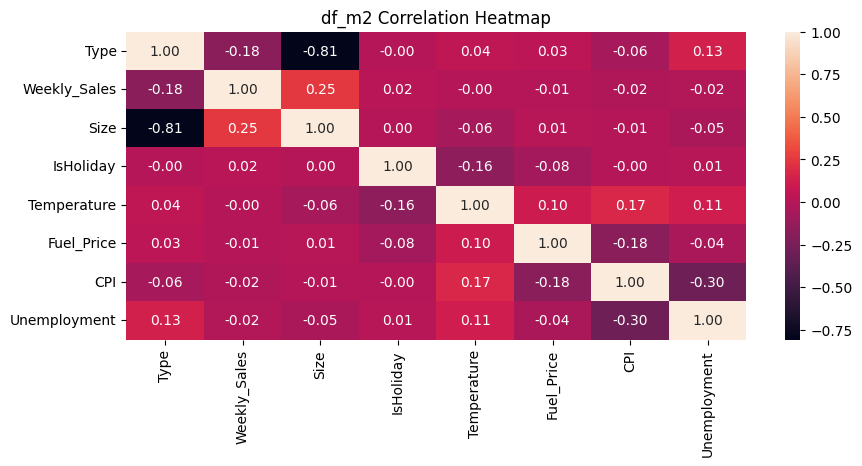

In [74]:
# Calculate the correlation matrix
df_m2_corr = df_m2_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr() # drop columns

# Create a heatmap
plt.figure(figsize=(10, 4))  # Adjust the figure size if needed
sns.heatmap(df_m2_corr, annot=True, fmt=".2f")
plt.title("df_m2 Correlation Heatmap")
plt.show()

In [76]:
# filter null values into separate dataframe and reset index order
df_null = df_m2[df_m2['Weekly_Sales'].isnull()] # filter null values
df_null.reset_index(drop=True, inplace=True) # reset index

# also filter non-null values into separate dataframe and reset index order
df_notnull = df_m2[df_m2['Weekly_Sales'].notnull()] # filter non-null values
df_notnull.reset_index(drop=True, inplace=True) # reset index

# make vector(x) and label(y) variables
x = df_notnull.drop(columns=['Weekly_Sales', 'diff'], axis=1) # drop 'Weekly_Sales' and 'diff' columns
y = df_notnull['Weekly_Sales'] # select 'Weekly_Sales' column
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) # split data and set random_state

# Random Forest algorithm performs well to predict unseen data
model = RandomForestRegressor().fit(x_train, y_train) # train
y_pred = model.predict(x_test) # predict

mse = mean_squared_error(y_test, y_pred) # calculate mean squared error
rmse = np.sqrt(mse) # calculate root mean squared error
r2 = r2_score(y_test, y_pred) # calculate R2
mae = mean_absolute_error(y_test, y_pred) # calculate mean absolute error

metrics = {'R2': r2, # R2 score
           'Mean Absolute Error': mae, #mean absolute error
           'Mean Squared Error': mse, # mean squared error
           'Root Mean Squared Error': rmse} # root mean squared error
print(metrics)

{'R2': 0.9766997773725801, 'Mean Absolute Error': 1359.433405507895, 'Mean Squared Error': 11811954.760325886, 'Root Mean Squared Error': 3436.8524496006353}


In [77]:
import pickle

# save the model to pickle
with open(r"model\model2.pkl", 'wb') as f:
    pickle.dump(model, f)

# **Final**

In [78]:
# df_m1

{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9962977059898378, 'R2_test': 0.9742634686561732} # this is the best model

{'R2': 0.9737178130306225, 'MAE': 1434.254303695727, 'MSE': 13323649.668453334, 'RMSE': 3650.157485431736} # this is the best model

{'R2': 0.9737178130306225,
 'MAE': 1434.254303695727,
 'MSE': 13323649.668453334,
 'RMSE': 3650.157485431736}

In [79]:
# df_m2

{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9967069973143954, 'R2_test': 0.9765555649166456}

{'R2': 0.9774999505349639, 'MAE': 1356.8024090382305, 'MSE': 11406310.172905441, 'RMSE': 3377.3229299114173}

{'R2': 0.9774999505349639,
 'MAE': 1356.8024090382305,
 'MSE': 11406310.172905441,
 'RMSE': 3377.3229299114173}

In [80]:
data5.describe() # describe

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,420212.000000,551479.000000,551479.000000,551479.000000,551479.000000,280405.000000,207897.000000,254619.000000,248649.000000,281341.000000,508176.000000,508176.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,16033.114591,136073.691863,0.071905,58.703624,3.413010,7369.403469,3489.575965,1859.728572,3355.891061,4261.631495,172.200115,7.775470,0.510157
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22729.492116,61207.331445,0.258330,18.685408,0.427725,9439.253385,8920.862286,11633.662079,6889.409946,13679.851274,39.595683,1.863253,0.499897
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,0.000000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,2120.130000,93638.000000,0.000000,45.160000,3.050000,2014.470000,74.240000,7.330000,319.190000,1524.870000,132.529129,6.614000,0.000000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7661.700000,128107.000000,0.000000,59.940000,3.524000,5011.720000,397.960000,41.390000,1202.440000,2825.360000,182.517732,7.771000,1.000000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,20271.265000,202505.000000,0.000000,73.160000,3.746000,9264.480000,2359.440000,177.270000,3380.280000,4930.020000,213.871114,8.549000,1.000000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,1.000000


In [81]:
df_m1_weekly_sales.describe() # describe the df_m1

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,15634.543022,136073.691863,0.071905,58.703624,3.413010,7100.329270,2937.871489,1249.167901,3222.706581,4791.106644,172.627503,7.701412
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22614.862815,61207.331445,0.258330,18.685408,0.427725,8026.915881,7430.131331,9337.704052,6335.309541,11237.581979,39.771080,1.862913
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,1841.455000,93638.000000,0.000000,45.160000,3.050000,2463.353600,81.901300,9.100000,257.373300,1963.400000,132.692414,6.529000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7253.550000,128107.000000,0.000000,59.940000,3.524000,5515.104300,277.098500,32.626300,1240.875900,3536.040000,182.544590,7.716000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,19794.265000,202505.000000,0.000000,73.160000,3.746000,8906.380000,2005.727400,106.878700,3336.073500,5450.773100,214.417648,8.523000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [82]:
df_m1_weekly_sales.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']).describe() # describe the df_m1 without markdown


,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,15634.543022,136073.691863,0.071905,58.703624,3.413010,172.627503,7.701412
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22614.862815,61207.331445,0.258330,18.685408,0.427725,39.771080,1.862913
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,126.064000,3.684000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,1841.455000,93638.000000,0.000000,45.160000,3.050000,132.692414,6.529000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7253.550000,128107.000000,0.000000,59.940000,3.524000,182.544590,7.716000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,19794.265000,202505.000000,0.000000,73.160000,3.746000,214.417648,8.523000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,228.976456,14.313000


In [83]:
df_m2_weekly_sales.describe() # describe the df_m2

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,15638.064487,136073.691863,0.071905,58.703624,3.413010,172.630469,7.700637
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22672.602509,61207.331445,0.258330,18.685408,0.427725,39.774109,1.862939
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,126.064000,3.684000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,1831.525000,93638.000000,0.000000,45.160000,3.050000,132.693226,6.529000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7242.430000,128107.000000,0.000000,59.940000,3.524000,182.544590,7.706000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,19784.900000,202505.000000,0.000000,73.160000,3.746000,214.417648,8.523000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,228.976456,14.313000


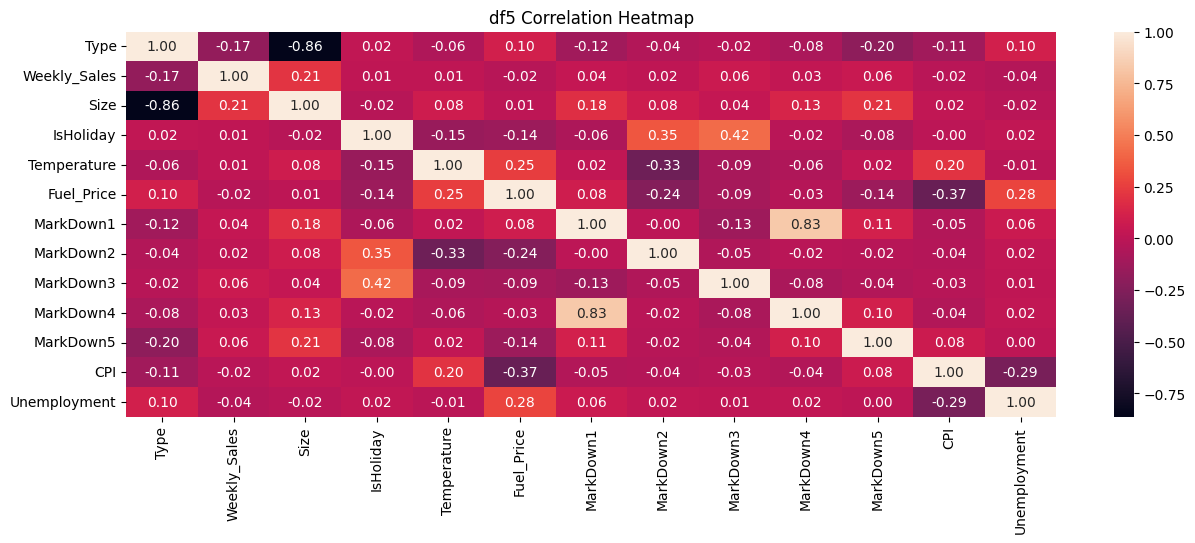

In [84]:
df5_corr = data5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr() # drop columns
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df5_corr, annot=True, fmt=".2f")
plt.title("df5 Correlation Heatmap")
plt.show()

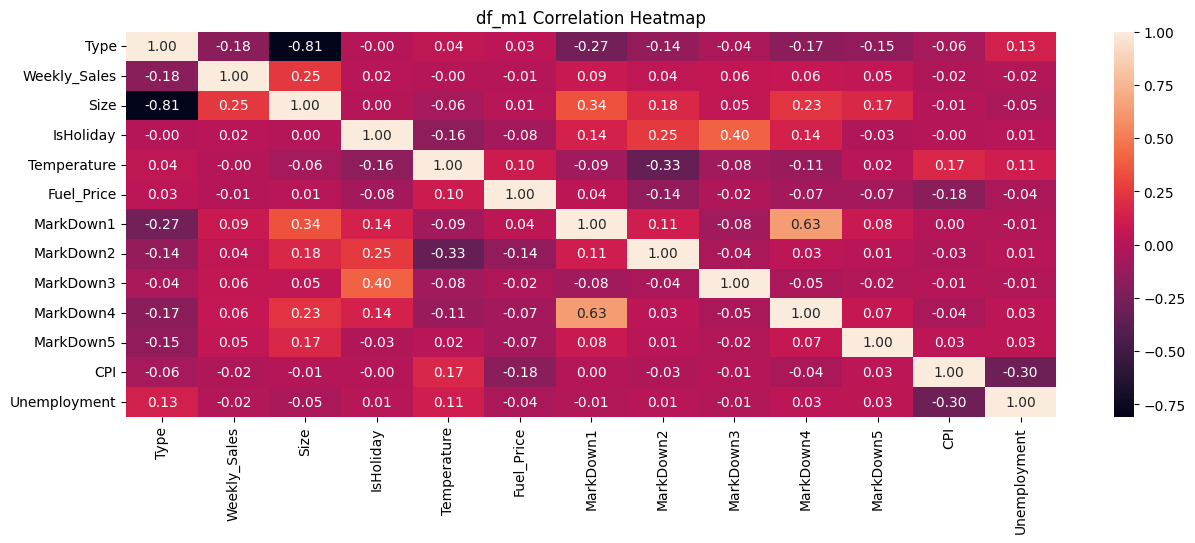

In [85]:
df_m1_corr = df_m1_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr() # drop columns
plt.figure(figsize=(15, 5))
sns.heatmap(df_m1_corr, annot=True, fmt=".2f")
plt.title("df_m1 Correlation Heatmap")
plt.show()

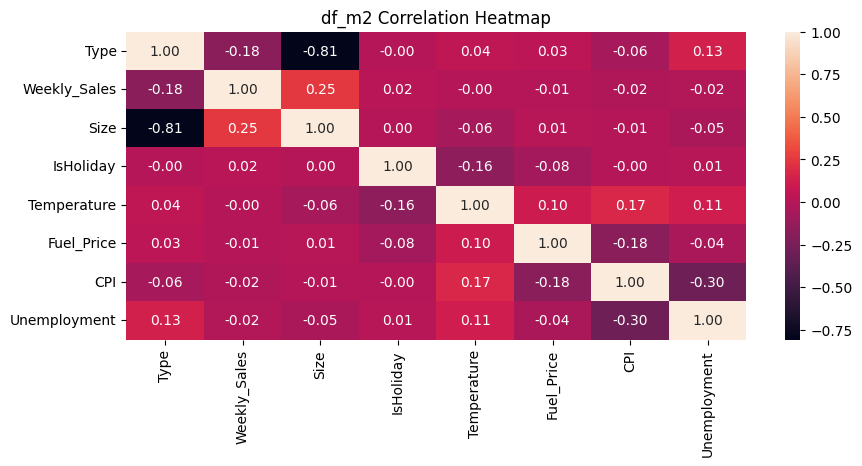

In [86]:
df_m2_corr = df_m2_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr() # drop columns
plt.figure(figsize=(10, 4))
sns.heatmap(df_m2_corr, annot=True, fmt=".2f")
plt.title("df_m2 Correlation Heatmap")
plt.show()